<h1> I. Load the data from Github </h1>

In [46]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 4GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

In [47]:
import pandas as pd

#Test Data Frame
path = "https://raw.githubusercontent.com/Carlita99/dataset-project/master/attacked_messages_test/"
allfiles = [path + "aircraft_0_00a2e4_attacked.csv", path + "aircraft_20_394c12_attacked.csv", path + "aircraft_23_3991e2_attacked.csv", path + "aircraft_24_39bd27_attacked.csv"]
li = []

for filename in allfiles:
    df = pd.read_csv(str(filename), index_col=None, header=0)
    li.append(df)

testFrame = pd.concat(li, axis=0, ignore_index=True)
print("First five elements of the Test Data Frame\n")
print(testFrame.head(5))
print("\nLast five elements of the Test Data Frame\n")
print(testFrame.tail(5))
print("\nTest Data Frame Size:", testFrame.size)

#Train Data Frame
path = "https://raw.githubusercontent.com/Carlita99/dataset-project/master/attacked_messages_train/"
allfiles = [path + "aircraft_28_3c09ee_attacked.csv", path + "aircraft_31_3c0fe6_attacked.csv", path + "aircraft_33_3c4907_attacked.csv", path + "aircraft_35_3c49eb_attacked.csv", path + "aircraft_36_3c56e6_attacked.csv", path + "aircraft_37_3c5ee1_attacked.csv", path + "aircraft_38_3c6441_attacked.csv", path + "aircraft_45_3c6624_attacked.csv", path + "aircraft_48_3c6676_attacked.csv", path + "aircraft_49_3c66a5_attacked.csv"]
li = []

for filename in allfiles:
    df = pd.read_csv(str(filename), index_col=None, header=0)
    li.append(df)
values = df.values
trainFrame = pd.concat(li, axis=0, ignore_index=True)
print ("\n----------------------------------------------------------------\n")
print("First five elements of the Train Data Frame\n")
print(trainFrame.head(5))
print("\nLast five elements of the Train Data Frame\n")
print(trainFrame.tail(5))
print("\nTrain Data Frame Size:", trainFrame.size)

First five elements of the Test Data Frame

   time  y      ALT   LAT-POS  LON-POS  SPEED     T-H
0     0  0  34975.0  47.80614  6.67399  553.0  181.45
1     1  0  34975.0  47.80614  6.67399  553.0  181.45
2     2  0  34975.0  47.80614  6.67399  553.0  181.45
3     3  0  34975.0  47.80614  6.67399  553.0  181.45
4     4  0  34975.0  47.80459  6.67398  553.0  181.45

Last five elements of the Test Data Frame

       time  y      ALT   LAT-POS   LON-POS  SPEED     T-H
19822  4198  0  37000.0  47.34315  10.46908  534.0  104.84
19823  4199  0  37000.0  47.34074  10.48251  534.0  104.84
19824  4200  0  37000.0  47.34074  10.48251  534.0  104.84
19825  4201  0  37000.0  47.34032  10.48476  534.0  104.84
19826  4202  0  37000.0  47.34004  10.48645  534.0  104.84

Test Data Frame Size: 138789

----------------------------------------------------------------

First five elements of the Train Data Frame

   time  y     ALT   LAT-POS  LON-POS  SPEED     T-H
0     0  0  3350.0  47.55590  7.53979  

analyse the data

In [48]:
# check if  dataset columns contains missing records
missing_values_perc=100*(df.isnull().sum()/len(df))
missing_values_perc

time       0.0
y          0.0
ALT        0.0
LAT-POS    0.0
LON-POS    0.0
SPEED      0.0
T-H        0.0
dtype: float64

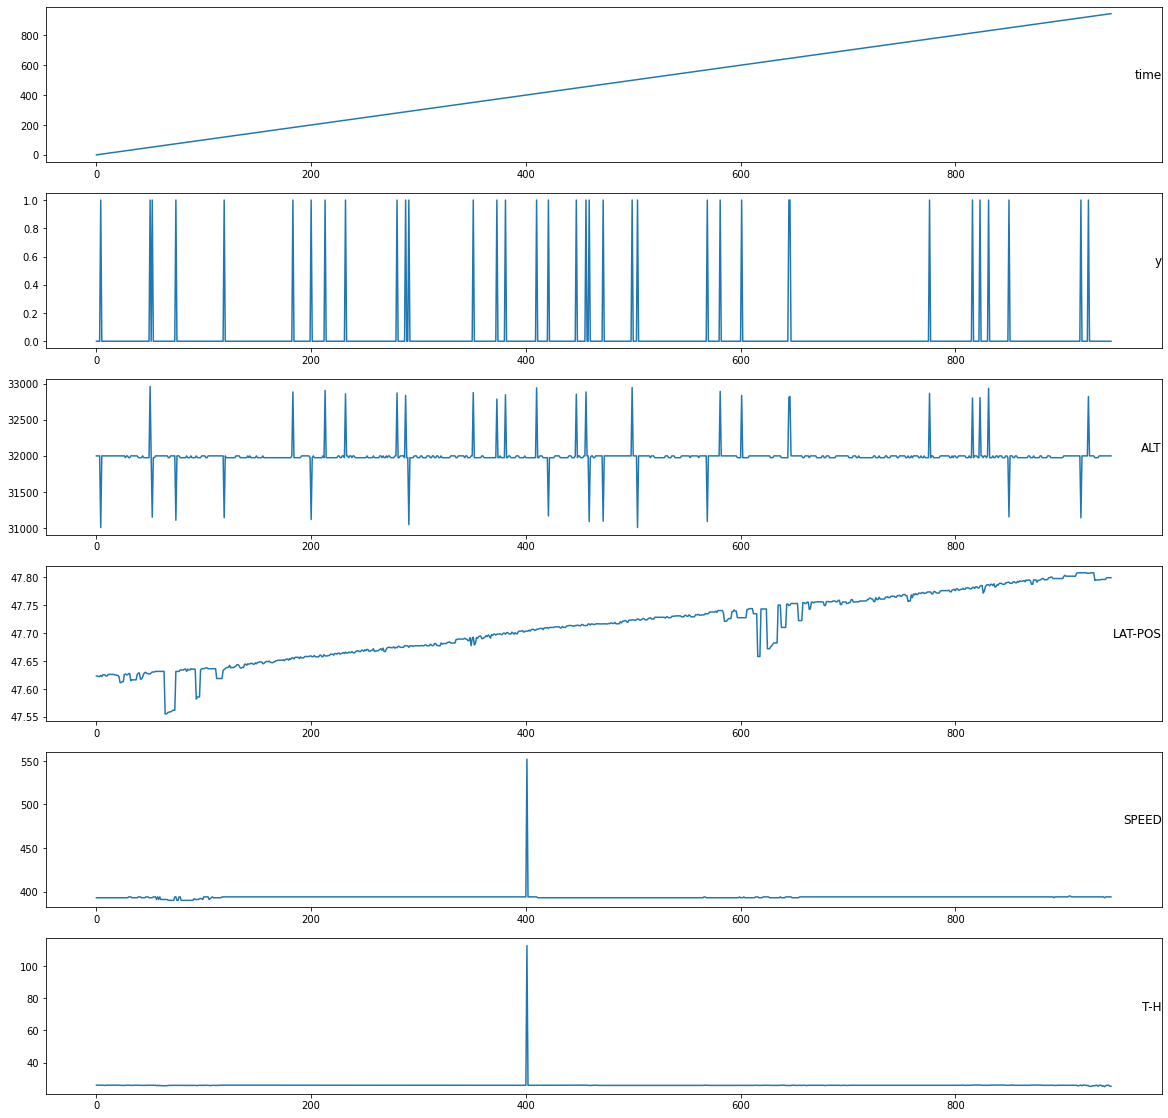

In [49]:
from matplotlib import pyplot
import seaborn as sns
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6]
i = 1
# plot each column
pyplot.figure(figsize=(20,20))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

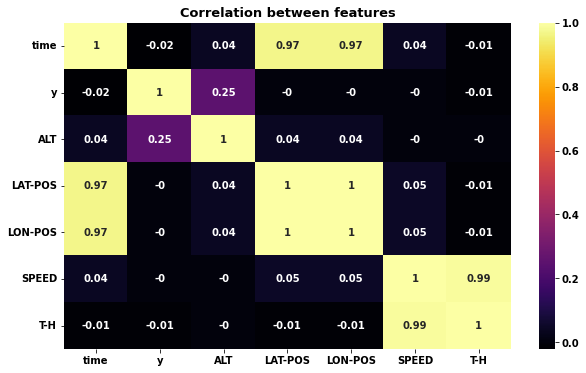

In [50]:
pyplot.figure(figsize=(10,6))
pyplot.rcParams["font.weight"] = "bold"
pyplot.rcParams['font.size']=10
pyplot.title('Correlation between features',fontweight='bold',fontsize = 13)
sns.heatmap(df.corr().round(2),annot=True,cmap='inferno');

Split the input and output test and train data

In [51]:
import numpy as np
from numpy import hstack

# Test Data
# input1 = testFrame["time"].values
# input1 = np.reshape(input1, (-1,1))
input2 = testFrame["ALT"].values
input2 = np.reshape(input2, (-1,1))
input3 = testFrame["LAT-POS"].values
input3 = np.reshape(input3, (-1,1))
input4 = testFrame["LON-POS"].values
input4 = np.reshape(input4, (-1,1))
input5 = testFrame["SPEED"].values
input5 = np.reshape(input5, (-1,1))
input6 = testFrame["T-H"].values
input6 = np.reshape(input6, (-1,1))
output = testFrame["y"].values
output = np.reshape(output, (-1,1))

test_x = hstack(( input2, input3, input4, input5, input6))
test_y = output
print("Elements in the Test x set: ")
print(test_x)
print("\nTest x set shape: ", test_x.shape)
print("\nElements in the Test y set: ")
print(test_y)
print("\nTest y set shape: ", test_y.shape)

print ("\n----------------------------------------------------------------\n")

# Train Data
# input1 = trainFrame["time"].values
# input1 = np.reshape(input1, (-1,1))
input2 = trainFrame["ALT"].values
input2 = np.reshape(input2, (-1,1))
input3 = trainFrame["LAT-POS"].values
input3 = np.reshape(input3, (-1,1))
input4 = trainFrame["LON-POS"].values
input4 = np.reshape(input4, (-1,1))
input5 = trainFrame["SPEED"].values
input5 = np.reshape(input5, (-1,1))
input6 = trainFrame["T-H"].values
input6 = np.reshape(input6, (-1,1))
output = trainFrame["y"].values
output = np.reshape(output, (-1,1))

train_x = hstack(( input2, input3, input4, input5, input6))
train_y = output
print("Elements in the Train x set: ")
print(train_x)
print("\nTrain x set shape: ", train_x.shape)
print("\nElements in the Train y set: ")
print(train_y)
print("\nTrain y set shape: ", train_y.shape)

Elements in the Test x set: 
[[3.497500e+04 4.780614e+01 6.673990e+00 5.530000e+02 1.814500e+02]
 [3.497500e+04 4.780614e+01 6.673990e+00 5.530000e+02 1.814500e+02]
 [3.497500e+04 4.780614e+01 6.673990e+00 5.530000e+02 1.814500e+02]
 ...
 [3.700000e+04 4.734074e+01 1.048251e+01 5.340000e+02 1.048400e+02]
 [3.700000e+04 4.734032e+01 1.048476e+01 5.340000e+02 1.048400e+02]
 [3.700000e+04 4.734004e+01 1.048645e+01 5.340000e+02 1.048400e+02]]

Test x set shape:  (19827, 5)

Elements in the Test y set: 
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]

Test y set shape:  (19827, 1)

----------------------------------------------------------------

Elements in the Train x set: 
[[3.350000e+03 4.755590e+01 7.539790e+00 1.460000e+02 2.063900e+02]
 [3.375000e+03 4.755562e+01 7.539510e+00 1.460000e+02 2.063900e+02]
 [3.375000e+03 4.755533e+01 7.539230e+00 1.460000e+02 2.063900e+02]
 ...
 [3.200000e+04 4.779909e+01 8.686820e+00 3.940000e+02 2.585000e+01]
 [3.200000e+04 4.779909e+01 8.686820e+00 3.940000e+02 2

Normalize the data [0,1] using MinMaxScaler

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
train_y = scaler.fit_transform(train_y)
test_x = scaler.fit_transform(test_x)
test_y = scaler.fit_transform(test_y)

print("Normalized Test x: ")
print(test_x)
print("\nNormalized Test y: ")
print(test_y)
print("\nNormalized Train x: ")
print(train_x)
print("\nNormalized Train y: ")
print(train_y)
assert(len(test_x) == len(test_y))
assert(len(train_x) == len(train_y))
print('Test x shape ',test_x.shape)
print('Tran x shape ',train_x.shape)
n_features = train_x.shape[1]

Normalized Test x: 
[[0.92007997 0.99995315 0.63643941 0.95555556 0.39140635]
 [0.92007997 0.99995315 0.63643941 0.95555556 0.39140635]
 [0.92007997 0.99995315 0.63643941 0.95555556 0.39140635]
 ...
 [0.97335122 0.99021845 0.99962428 0.87111111 0.05856541]
 [0.97335122 0.99020967 0.99983884 0.87111111 0.05856541]
 [0.97335122 0.99020381 1.         0.87111111 0.05856541]]

Normalized Test y: 
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]

Normalized Train x: 
[[0.08367469 0.99472225 0.71862687 0.26449275 0.57370396]
 [0.08429913 0.99471639 0.71860018 0.26449275 0.57370396]
 [0.08429913 0.99471032 0.7185735  0.26449275 0.57370396]
 ...
 [0.79928065 0.99980903 0.82795174 0.71376812 0.07185546]
 [0.79928065 0.99980903 0.82795174 0.71376812 0.07004864]
 [0.79928065 0.99980903 0.82795174 0.71376812 0.07004864]]

Normalized Train y: 
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Test x shape  (19827, 5)
Tran x shape  (66172, 5)


Build the train and test sets using TimeseriesGenerator

In [53]:
from keras.preprocessing.sequence import TimeseriesGenerator
LENGTH=6
BATCH_SIZE=64
look_back = 3
trainGenerated = TimeseriesGenerator(train_x,train_y, length=look_back, sampling_rate=1,stride=1,batch_size=BATCH_SIZE)
print(trainGenerated)
print("Size of the generated train set :", len(trainGenerated))
# for i in range(len(trainGenerated)):
#     x, y = trainGenerated[i]
#     print(x.shape, y.shape)
testGenerated = TimeseriesGenerator(test_x,test_y,length=look_back,sampling_rate=1,stride=1,batch_size=BATCH_SIZE)
print("Size of the generated test set:", len(testGenerated))

Size of the generated train set : 1034
Size of the generated test set: 310


Define the Model

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Conv1D, Activation, GlobalMaxPooling1D
from keras.layers import Dropout
from keras.initializers import GlorotUniform
from tensorflow.keras.callbacks import EarlyStopping
initializer = GlorotUniform()
lstmModel = Sequential()
lstmModel.add(LSTM(64, input_shape=(look_back,n_features),return_sequences=True, kernel_initializer=initializer))
lstmModel.add(Dropout(0.2))
lstmModel.add(LSTM(32, kernel_initializer=initializer))
lstmModel.add(Dense(1))
lstmModel.compile(optimizer='adam', loss='mse')

Plot the model

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             17920     
                                                                 
 dropout_16 (Dropout)        (None, 3, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


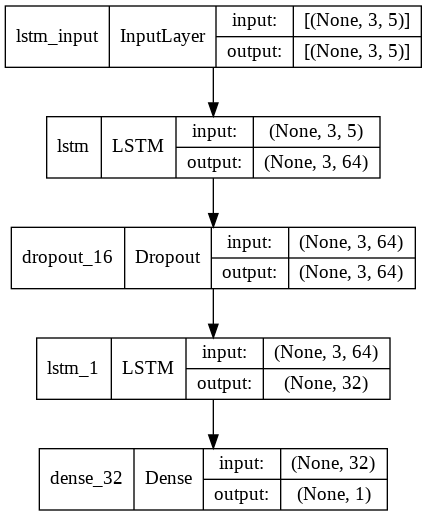

In [55]:
lstmModel.summary()
from keras.utils.vis_utils import plot_model
plot_model(lstmModel, to_file='lstmModel.png', show_shapes=True)
from IPython.display import Image
Image(filename='lstmModel.png') 

Train the model

In [56]:
history = lstmModel.fit(trainGenerated, epochs=20, validation_data=testGenerated, shuffle=True,callbacks=[EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)])

Epoch 1/20
1034/1034 [==============================] - 13s 9ms/step - loss: 0.0331 - val_loss: 0.0321
Epoch 2/20
1034/1034 [==============================] - 9s 8ms/step - loss: 0.0330 - val_loss: 0.0319
Epoch 3/20
1034/1034 [==============================] - 8s 8ms/step - loss: 0.0330 - val_loss: 0.0319
Epoch 4/20
1034/1034 [==============================] - 9s 9ms/step - loss: 0.0330 - val_loss: 0.0319
Epoch 5/20
1034/1034 [==============================] - 9s 8ms/step - loss: 0.0330 - val_loss: 0.0319
Epoch 6/20
1034/1034 [==============================] - 8s 8ms/step - loss: 0.0330 - val_loss: 0.0319
Epoch 7/20
1034/1034 [==============================] - 8s 8ms/step - loss: 0.0330 - val_loss: 0.0320
Epoch 00007: early stopping


Predict for both test and train sets

Plot the loss values

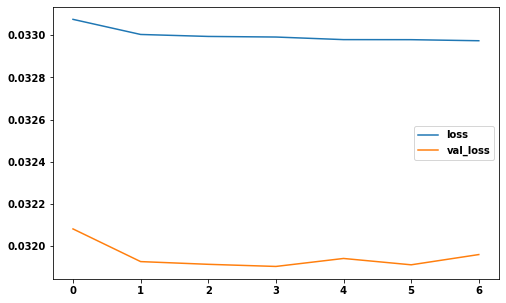

In [57]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

 Plot the original and predicted train data

In [58]:
# invert predictions
trainPredict = lstmModel.predict(trainGenerated)
print(trainPredict.shape)
testPredict = lstmModel.predict(testGenerated)
print(testPredict.shape)
# invert predictions, scale values back to real index/price range.
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

(66169, 1)
(19824, 1)


In [59]:
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

In [60]:
trainY = get_y_from_generator(trainGenerated)
testY = get_y_from_generator(testGenerated)
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

(66169, 1)
(19824, 1)


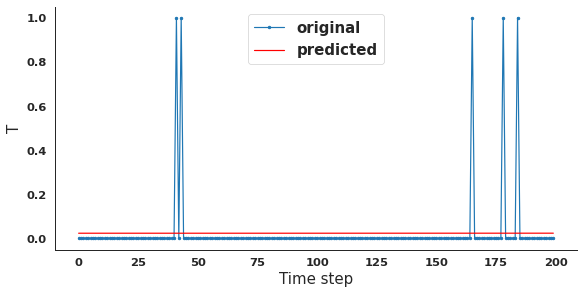

In [85]:
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
X_data = [x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(X_data, train_y[:200], marker='.', label="original")
plt.plot(X_data, trainPredict[:200], 'r', label="predicted")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('T', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

 Plot the original and predicted test data

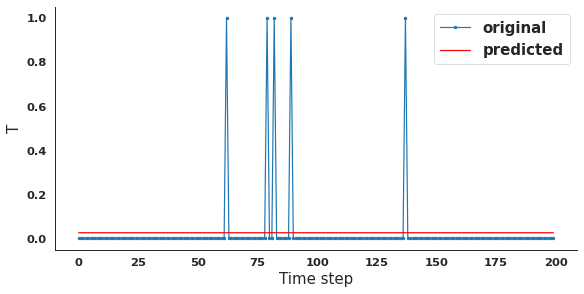

In [86]:
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

X_data = [x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(X_data, testY[:200], marker='.', label="original")
plt.plot(X_data, testPredict[:200], 'r', label="predicted")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('T', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

Analysis

In [63]:
# calculate root mean squared error
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.18 RMSE
Test Score: 0.18 RMSE


In [64]:
#calculate binary accuracy
def binary_accuracy(a, b):
    assert len(a) == len(b)
    return (a == b).sum() / len(a)    
print(binary_accuracy(trainY[:,0]>0,  trainPredict[:,0] >0))
print(binary_accuracy(testY[:,0]>0,  testPredict[:,0] >0))

0.034124741193005785
0.032990314769975784


# 1D CNN Model

In [73]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
kernel_size = 3
print(train_x.shape[0])
model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(8, kernel_size, padding="same", input_shape=(look_back,train_x.shape[1])),
  tf.keras.layers.Conv1D(16, kernel_size, padding="same",activation='relu'),
  tf.keras.layers.Conv1D(32, kernel_size, padding="same",activation='relu'),
  tf.keras.layers.Conv1D(64, kernel_size, padding="same", activation='relu'),
  tf.keras.layers.Conv1D(128, kernel_size,padding="same", activation='relu'),
  tf.keras.layers.GlobalMaxPooling1D(),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.summary()

66172
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_85 (Conv1D)          (None, 3, 8)              128       
                                                                 
 conv1d_86 (Conv1D)          (None, 3, 16)             400       
                                                                 
 conv1d_87 (Conv1D)          (None, 3, 32)             1568      
                                                                 
 conv1d_88 (Conv1D)          (None, 3, 64)             6208      
                                                                 
 conv1d_89 (Conv1D)          (None, 3, 128)            24704     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                               

In [74]:
history = model.fit(trainGenerated, epochs=20, validation_data=testGenerated, callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001), 
                               EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1),
                               EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)], shuffle=True)

Epoch 1/20
1034/1034 [==============================] - 10s 8ms/step - loss: 0.5104 - accuracy: 0.9650 - val_loss: 0.3717 - val_accuracy: 0.9670 - lr: 0.0010
Epoch 2/20
1034/1034 [==============================] - 8s 8ms/step - loss: 0.2974 - accuracy: 0.9659 - val_loss: 0.2393 - val_accuracy: 0.9670 - lr: 0.0010
Epoch 3/20
1034/1034 [==============================] - 7s 7ms/step - loss: 0.2096 - accuracy: 0.9659 - val_loss: 0.1834 - val_accuracy: 0.9670 - lr: 0.0010
Epoch 4/20
1034/1034 [==============================] - 8s 8ms/step - loss: 0.1723 - accuracy: 0.9659 - val_loss: 0.1593 - val_accuracy: 0.9670 - lr: 0.0010
Epoch 5/20
1034/1034 [==============================] - 8s 8ms/step - loss: 0.1567 - accuracy: 0.9659 - val_loss: 0.1494 - val_accuracy: 0.9670 - lr: 0.0010
Epoch 6/20
1034/1034 [==============================] - 7s 7ms/step - loss: 0.1509 - accuracy: 0.9659 - val_loss: 0.1461 - val_accuracy: 0.9670 - lr: 0.0010
Epoch 00006: early stopping


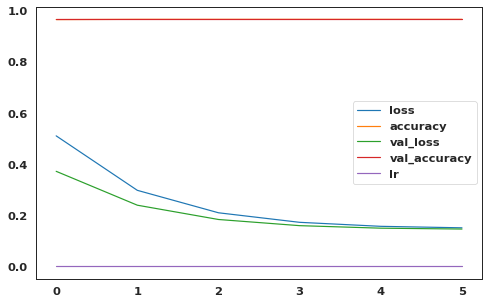

In [75]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# XGBoost Model

In [71]:
# xgboost
import xgboost
print("xgboost", xgboost.__version__)
from xgboost import XGBRegressor
model = XGBRegressor(
   max_depth=20, 
   learning_rate=0.2,
   n_estimators=1250,
   objective='binary:logistic'
   )
model.fit(
    train_x, 
    train_y, 
    eval_metric="rmse", 
    eval_set=[(train_x, train_y), (test_x, test_y)], 
    verbose=True, 
    early_stopping_rounds = 10)

xgboost 0.90
[0]	validation_0-rmse:0.408899	validation_1-rmse:0.538806
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.338983	validation_1-rmse:0.57759
[2]	validation_0-rmse:0.284003	validation_1-rmse:0.613204
[3]	validation_0-rmse:0.24148	validation_1-rmse:0.637595
[4]	validation_0-rmse:0.207954	validation_1-rmse:0.654409
[5]	validation_0-rmse:0.182432	validation_1-rmse:0.678916
[6]	validation_0-rmse:0.162328	validation_1-rmse:0.693069
[7]	validation_0-rmse:0.144938	validation_1-rmse:0.698089
[8]	validation_0-rmse:0.13149	validation_1-rmse:0.701694
[9]	validation_0-rmse:0.121238	validation_1-rmse:0.704147
[10]	validation_0-rmse:0.112025	validation_1-rmse:0.706137
Stopping. Best iteration:
[0]	validation_0-rmse:0.408899	validation_1-rmse:0.538806



XGBRegressor(learning_rate=0.2, max_depth=20, n_estimators=1250,
             objective='binary:logistic')

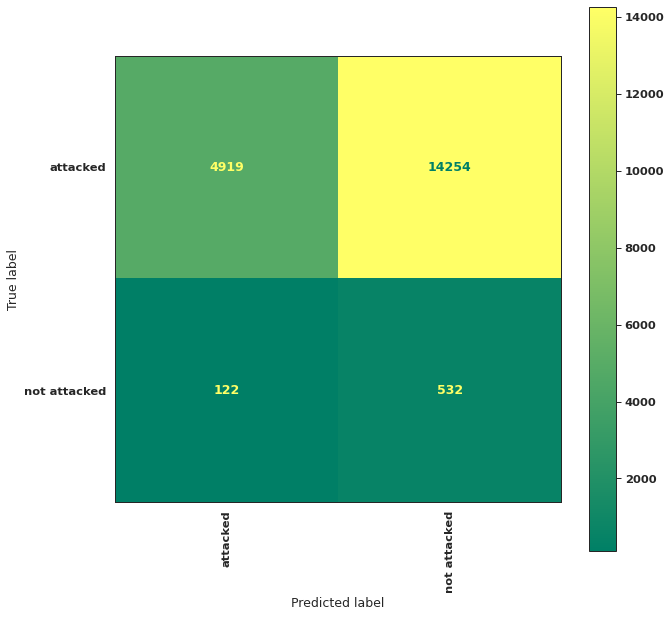

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
y_pred = model.predict(test_x)
Y_pred = []
for i in y_pred:
  if i> 0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)

cm = confusion_matrix(test_y, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['attacked','not attacked'])
# figure was smashed due to limited figure size we had to use matplotlib to expand the figsize 
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')